### THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX Kì 1 2025-2026)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Giảng viên: Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

=========================

MSSV: 24880077

Họ và tên: Lê Bùi Quốc Vũ

---

MSSV: 23880096

Họ và tên: Hoàng Ngọc Tuấn

---
MSSV : 21810009

Họ và tên : Thiệu Quốc Đăng

===========================

# Embedding trong Machine Learning

> Embedding là cách biểu diễn các thực thể rời rạc (từ ngữ, sản phẩm, người dùng, nút đồ thị, v.v.) thành các vector số thực dày đặc có kích thước thấp sao cho cấu trúc/ngữ nghĩa được bảo toàn trong không gian vector.

## Vì sao cần embedding?
- One-hot hay count vector dẫn đến vector thưa, chiều rất lớn và không nắm bắt quan hệ ngữ nghĩa.
- Embedding nén thông tin vào không gian liên tục, cho phép đo tương tự (cosine/L2), suy luận quan hệ và tăng hiệu quả tính toán.

## Đặc tính chính
- Dense, low-dimensional: kích thước hàng chục đến vài trăm.
- Tính “tương tự gần nhau”: các thực thể liên quan nằm gần nhau trong không gian.
- Có thể học được từ dữ liệu (tự giám sát hoặc giám sát yếu).

## Ứng dụng phổ biến
- NLP: word/sentence/document embeddings, tìm kiếm, gợi ý, phân cụm chủ đề.
- Recommender Systems: user/item embeddings; tính tương tự để xếp hạng.
- Đồ thị: node/graph embeddings (DeepWalk, node2vec) cho dự đoán liên kết/phân loại nút.
- Thị giác máy tính/Audio: trích xuất đặc trưng từ CNN/Transformer làm embedding cho retrieval.

## Thao tác dùng
- Chuẩn hóa vector (L2-normalize) và dùng cosine similarity để đo gần/xa.

## Lưu ý
- Bias trong dữ liệu có thể phản chiếu vào embedding; cần giám sát và giảm thiểu.
- OOV (từ ngoài từ vựng) với mô hình tĩnh; mô hình theo ngữ cảnh (ELMo/BERT) khắc phục tốt hơn.
- Dịch chuyển miền (domain shift): embedding học ở miền A có thể kém hiệu quả ở miền B.

# Word2Vec: giới thiệu
Word2Vec (Mikolov et al., 2013) là một kỹ thuật giúp chuyển đổi các từ thành các vector số (dãy số thực), để máy tính có thể hiểu và xử lý ngôn ngữ tự nhiên

Mỗi từ sẽ được biểu diễn bằng một vector, các từ giống nhau về nghĩa sẽ có vector gần nhau
- CBOW (Continuous Bag-of-Words): dự đoán từ trung tâm dựa trên các từ ngữ cảnh xung quanh.
- Skip-gram: dự đoán các từ ngữ cảnh dựa trên từ trung tâm.

## Hàm mục tiêu (ý tưởng)

- CBOW: tối đa hóa xác suất P(w_t | context).
- Skip-gram: tối đa hóa xác suất P(context | w_t).

## Siêu tham số quan trọng
- vector_size (dimensionality)
- window (kích thước cửa sổ ngữ cảnh)
- min_count (lọc từ hiếm)
- sg (0=CBOW, 1=Skip-gram)
- negative / hs (chọn Negative Sampling hay Hierarchical Softmax)
- sample (subsampling tần suất cao)
- epochs (số vòng lặp)

## Tính chất nổi bật
- Bắt được quan hệ tuyến tính: king - man + woman ≈ queen (trên tiếng Anh chuẩn).
- Hiệu quả, dễ huấn luyện trên tập lớn.

## Hạn chế
- Embedding tĩnh: một từ có một vector duy nhất, không phân biệt đa nghĩa theo ngữ cảnh.
- Nhạy với chất lượng dữ liệu; OOV nếu từ không xuất hiện khi huấn luyện.
- Kém hơn mô hình ngữ cảnh (ELMo/BERT) ở nhiều tác vụ phức tạp.

In [ ]:
# Imports cho Word2Vec, ELMo, và PhoBERT

# Word2Vec (gensim)
from gensim.models import Word2Vec # Thư viện chính để huấn luyện Word2Vec
from gensim.utils import simple_preprocess # Dùng để tách câu thành các từ (tokenization)

# ELMo: qua Flair trên Windows
try:
    from flair.embeddings import ELMoEmbeddings
    from flair.data import Sentence
    ELMO_BACKEND = "flair"
except Exception as e:
    ELMO_BACKEND = None
    print("Flair chưa sẵn sàng cho ELMo:", e)

# PhoBERT (Hugging Face Transformers)
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

## Demo Word2Vec

In [ ]:
# 1. Chuẩn bị dữ liệu (Corpus)
corpus = [
    'king is a man',
    'queen is a woman',
    'man and woman are human',
    'paris is the capital of france',
    'london is the capital of england',
    'tokyo is the capital of japan',
    'apple and orange are fruits',
    'cats and dogs are animals',
    'the quick brown fox jumps over the lazy dog'
]

# 2. Tiền xử lý: Tách từ (Tokenization)
# Mô hình Word2Vec cần đầu vào là danh sách các câu, và mỗi câu là một danh sách các từ.
# Hàm simple_preprocess() sẽ giúp ta:
# - Tách câu thành từng từ riêng lẻ.
# - Chuyển tất cả về chữ thường.
# - Loại bỏ dấu câu.
sentences = [simple_preprocess(s) for s in corpus]

print('Các câu sau khi tách từ (tokenized):')
for s in sentences[:2]:
    print(s)

# 3. Huấn luyện (Train) mô hình Word2Vec
model = Word2Vec(
    sentences,     # Dữ liệu đầu vào (danh sách các câu đã tách từ)
    vector_size=100, # Kích thước vector: Mỗi từ sẽ được biểu diễn bằng 1 vector 100 chiều (100 con số)
    window=5,        # Kích thước cửa sổ: Mô hình sẽ học 1 từ dựa trên 5 từ đứng trước và 5 từ đứng sau nó
    min_count=1,     # Chỉ học những từ xuất hiện ít nhất 1 lần
    sg=1,            # sg=1 nghĩa là dùng thuật toán Skip-gram (cố gắng dự đoán từ xung quanh)
                     # sg=0 (mặc định) là dùng CBOW (dự đoán từ ở giữa)
    epochs=100,      # Số lần mô hình "đọc" đi đọc lại toàn bộ dữ liệu để học. 
                     # Vì dữ liệu của ta quá nhỏ (chỉ 9 câu) nên cần lặp lại nhiều lần.
    workers=1        # Số luồng CPU sử dụng để huấn luyện
)

print('\n--- Kết quả sau khi huấn luyện ---')

# Kiểm tra từ vựng (vocabulary) mà mô hình đã học được
# model.wv.index_to_key chứa danh sách tất cả các từ trong từ điển
print('\nTừ vựng (Vocab) mô hình đã học:', list(model.wv.index_to_key))

# Lấy vector của một từ cụ thể (ví dụ: "king")
# Vector này sẽ có 100 con số (vì ta chọn vector_size=100)
print('Vector của từ "king" (6 giá trị đầu):', model.wv['king'][:6])

# Tìm các từ giống nhất (gần nhất về mặt vector) với từ "king"
# topn=5 là lấy 5 từ giống nhất
print('\nCác từ giống "king" nhất:', model.wv.most_similar('king', topn=5))

# 5. Thử nghiệm phép toán tương tự (Analogy)
# Đây là phần thú vị nhất: king - man + woman -> ?
# Ta muốn tìm một từ (X) sao cho: X gần giống với (king - man + woman)
# Ý nghĩa: "Vua" (king) đối với "Đàn ông" (man) 
#          giống như X đối với "Phụ nữ" (woman)
# -> Kết quả kỳ vọng là "Nữ hoàng" (queen)

print('\nPhép toán tương tự: king - man + woman =>', 
      model.wv.most_similar(positive=['king', 'woman'], # Các từ "dấu cộng"
                            negative=['man'],         # Các từ "dấu trừ"
                            topn=5))                  # Lấy 5 kết quả hàng đầu

Các câu sau khi tách từ (tokenized):
['king', 'is', 'man']
['queen', 'is', 'woman']

--- Kết quả sau khi huấn luyện ---

Từ vựng (Vocab) mô hình đã học: ['the', 'is', 'of', 'capital', 'are', 'and', 'woman', 'man', 'dog', 'lazy', 'over', 'jumps', 'fox', 'brown', 'quick', 'animals', 'dogs', 'cats', 'fruits', 'orange', 'apple', 'japan', 'tokyo', 'england', 'london', 'france', 'paris', 'human', 'queen', 'king']
Vector của từ "king" (6 giá trị đầu): [-0.0043498  -0.00910412 -0.0018158  -0.00373116  0.00900706  0.00274658]

Các từ giống "king" nhất: [('of', 0.17481335997581482), ('tokyo', 0.14032220840454102), ('england', 0.13598138093948364), ('lazy', 0.1096096783876419), ('fruits', 0.1008637472987175)]

Phép toán tương tự: king - man + woman => [('of', 0.18026600778102875), ('japan', 0.17652998864650726), ('queen', 0.11423632502555847), ('lazy', 0.10608942061662674), ('france', 0.06918398290872574)]


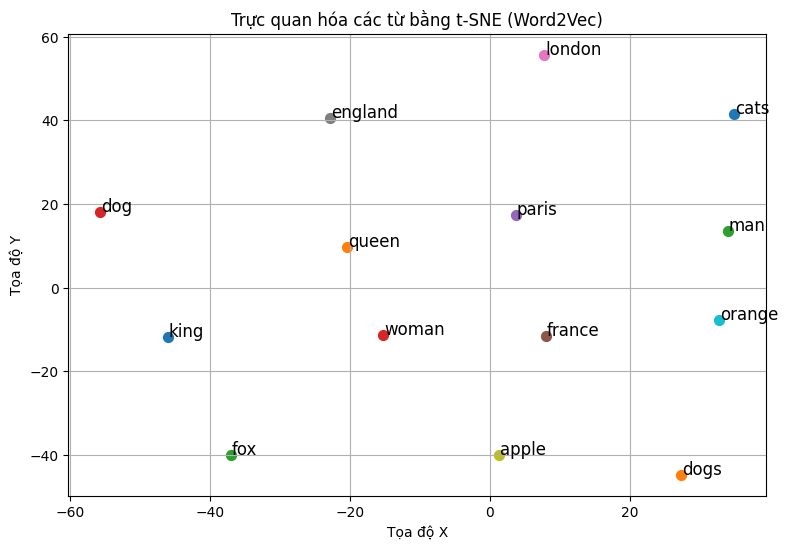

In [ ]:
# Thư viện để vẽ biểu đồ, đồ thị
import matplotlib.pyplot as plt 
# Tải công cụ t-SNE từ thư viện Scikit-learn (sklearn)
from sklearn.manifold import TSNE 
# Thư viện để làm việc với mảng (array) và ma trận, rất cần cho tính toán vector
import numpy as np

# --- 2. Chuẩn bị dữ liệu ---
# Chọn một danh sách các từ mà chúng ta muốn trực quan hóa
words = [
    'king', 'queen', 'man', 'woman',      # Nhóm 1: Người/Hoàng gia
    'paris', 'france', 'london', 'england', # Nhóm 2: Thủ đô/Quốc gia
    'apple', 'orange',                     # Nhóm 3: Hoa quả
    'cats', 'dogs', 'fox', 'dog'           # Nhóm 4: Động vật
]

# Đây là một bước lọc an toàn:
# Đảm bảo rằng chúng ta chỉ lấy những từ (w) thực sự tồn tại
# trong từ vựng (model.wv.key_to_index) của mô hình đã huấn luyện.
# Nếu gõ nhầm một từ không có, code sẽ không bị lỗi.
words = [w for w in words if w in model.wv.key_to_index]

# Lấy các vector (100 chiều) tương ứng với mỗi từ trong danh sách 'words'
# và gộp chúng lại thành một ma trận (một mảng lớn chứa nhiều mảng con)
vecs = np.array([model.wv[w] for w in words])

# --- 3. Chạy thuật toán t-SNE ---

# Khởi tạo (cấu hình) mô hình t-SNE
tsne = TSNE(
    n_components=2,   # n_components=2: Yêu cầu nén xuống còn 2 chiều (x, y)
    random_state=42,  # Đặt một số ngẫu nhiên cố định để mỗi lần chạy code
                      # kết quả ra biểu đồ y hệt nhau (giúp tái lập kết quả)
    init='pca',       # Dùng 'pca' để khởi tạo giúp kết quả ổn định và nhanh hơn
    learning_rate='auto', # Để t-SNE tự động chọn tốc độ học
    perplexity=10      # perplexity là một tham số quan trọng ảnh hưởng đến kết quả
)

# Đây là lệnh quan trọng nhất:
# .fit_transform(vecs): Yêu cầu t-SNE "học" (fit) từ ma trận 'vecs' (100 chiều)
# và "biến đổi" (transform) nó thành một ma trận 'xy' (2 chiều)
xy = tsne.fit_transform(vecs)
# --- 4. Vẽ biểu đồ (Plotting) ---

# Tạo một khung vẽ biểu đồ với kích thước 9x6 (inches)
plt.figure(figsize=(9, 6))

# Vẽ các điểm lên biểu đồ và ghi nhãn từng từ
for i, word in enumerate(words):
    plt.scatter(xy[i, 0], xy[i, 1], s=50)
    plt.text(xy[i, 0]+0.1, xy[i, 1]+0.1, word, fontsize=12)

plt.title("Trực quan hóa các từ bằng t-SNE (Word2Vec)")
plt.xlabel("Tọa độ X")
plt.ylabel("Tọa độ Y")
plt.grid(True)
plt.show()

## ELMo (Hiện tại chỉ hỗ trợ tiếng Anh)

ELMo (Embeddings from Language Models) là một phương pháp biểu diễn từ (word embedding) nâng cao, được giới thiệu năm 2018.

Khác với Word2Vec, ELMo tạo vector cho mỗi từ dựa vào ngữ cảnh của câu, tức là cùng một từ nhưng ở các câu khác nhau sẽ có vector khác nhau.

# Đặc điểm : 

Theo ngữ cảnh: Vector của từ thay đổi tùy vào vị trí và ý nghĩa trong câu.

Dựa trên mô hình ngôn ngữ sâu: Sử dụng mạng nơ-ron LSTM hai chiều (biLSTM) để học cách các từ liên kết với nhau trong văn bản.

Cải thiện hiệu quả: Giúp các mô hình NLP như phân loại, nhận diện thực thể, trả lời câu hỏi... đạt kết quả tốt hơn so với embedding tĩnh.

# Ví dụ minh họa

Từ “bank” trong câu “He sat on the river bank” (bờ sông) và “She went to the bank to deposit money” (ngân hàng) sẽ có hai vector khác nhau với 
ELMo, còn Word2Vec thì giống nhau.

# Ứng dụng

Phân loại văn bản, nhận diện thực thể, phân tích cảm xúc, dịch máy, chatbot...

Là nền tảng cho các mô hình embedding theo ngữ cảnh hiện đại hơn như BERT, PhoBERT.

## BERT là gì?

BERT (Bidirectional Encoder Representations from Transformers) là mô hình ngôn ngữ sâu của Google, ra mắt năm 2018.

BERT học biểu diễn từ (embedding) theo ngữ cảnh và hai chiều (trái-phải, phải-trái), giúp hiểu ý nghĩa từ trong câu tốt hơn các mô hình cũ như Word2Vec, ELMo.

## PhoBERT là gì?

PhoBERT là phiên bản BERT được huấn luyện riêng cho tiếng Việt bởi nhóm VinAI.

PhoBERT sử dụng kiến trúc giống BERT nhưng dữ liệu huấn luyện là văn bản tiếng Việt, nên cho kết quả tốt hơn với tiếng Việt.
Đặc điểm nổi bật

Biểu diễn từ theo ngữ cảnh: cùng một từ nhưng ở các câu khác nhau sẽ có vector khác nhau.
Học sâu, dựa trên kiến trúc Transformer (attention).

Có thể fine-tune cho nhiều tác vụ NLP: phân loại, nhận diện thực thể, trả lời câu hỏi, dịch máy...

## Ứng dụng

Phân loại văn bản (text classification)

Nhận diện thực thể (NER)

Phân tích cảm xúc

Tìm kiếm ngữ nghĩa

Chatbot, dịch máy...
